<a href="https://colab.research.google.com/github/orlandxrf/escuela-verano/blob/main/3_Escuela_Verano_preprocesamiento.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://raw.githubusercontent.com/orlandxrf/escuela-verano/main/img/logos.png" height="100" />

<h1>Escuela de verano del Laboratorio de Estructuras y Dinámicas Sociales</h1>
Escuela de Verano, 25-28 de Junio de 2024
<hr>
<h2><strong>Descubre el poder del PLN: aprende a pre-procesar, analizar y extraer información de textos<strong></h2>
<hr>

# Preprocesamiento de archivos

En el preprocesamiento de archivos de textos incluyen los pasos para: limpieza de caracteres no deseados y/o eliminar palabras vacías (stop-words), la normalización que consiste de la tokenización, la lematización (reducir las palabras a su forma base) y el etiquetado POS (Part-of-Speech).

Adicionalmente, se puede realizar un análisis de dependencias de los textos para identificar las relaciones entre las palabras.

## Obtener archivos

Para este taller se almacenan los archivos en [Github](https://github.com/orlandxrf/escuela-verano) adicional a todo el material usado.

Para evitar subir los archivos a Google Colab cada vez que se quiera trabajar con el Notebook, se realizará el proceso de forma automática. Para la descarga de los archivos se utiliza el comando `wget`

**Wget**, que significa "World Wide Web GET", es una utilidad de línea de comandos en sistemas operativos tipo Unix, como Linux, que se utiliza para descargar archivos de la web. Es una herramienta poderosa y versátil que permite descargar una amplia variedad de contenido.

La sintaxis para descargar un archivo es la siguiente:

```bash
!wget -P data/ https://raw.githubusercontent.com/orlandxrf/escuela-verano/main/data/El_maravilloso_Mago_de_Oz.pdf
```

El resultado esperado por cada archivo descargado es similar al siguiente

```bash
--2024-06-22 18:35:06--  https://github.com/orlandxrf/escuela-verano/blob/main/data/El_maravilloso_Mago_de_Oz.pdf
Resolving github.com (github.com)... 140.82.121.3
Connecting to github.com (github.com)|140.82.121.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘data/El_maravilloso_Mago_de_Oz.pdf’

El_maravilloso_Mago     [ <=>                ] 241.79K  --.-KB/s    in 0.03s   

2024-06-22 18:35:06 (8.05 MB/s) - ‘data/El_maravilloso_Mago_de_Oz.pdf’ saved [247596]
```

Es importante señalar que si la carpeta donde se desea almacenar el archivo no existe, se crea. En caso de descargar el archivo cuando previamente existe, lo que ocurre es que se sobre escribe el archivo descargado, es decir el archivo descargado reemplaza al previo, siempre y cuando tengan el mismo nombre.

In [ ]:
# descargar los archivos utilizando "wget"

#!wget -P data/ https://raw.githubusercontent.com/orlandxrf/escuela-verano/main/data/Escuela_de_verano.txt
!wget -P data/ https://raw.githubusercontent.com/orlandxrf/escuela-verano/main/data/Los_Caudillos_de_1830.txt
#!wget -P data/ https://raw.githubusercontent.com/orlandxrf/escuela-verano/main/data/ia_tweets.csv
#!wget -P data/fake_news/ https://raw.githubusercontent.com/orlandxrf/escuela-verano/main/data/fake_news/dev.xlsx
#!wget -P data/fake_news/ https://raw.githubusercontent.com/orlandxrf/escuela-verano/main/data/fake_news/train.xlsx
#!wget -P data/fake_news/ https://raw.githubusercontent.com/orlandxrf/escuela-verano/main/data/fake_news/test.xlsx
#!wget -P data/ https://github.com/orlandxrf/escuela-verano/blob/main/data/El_maravilloso_Mago_de_Oz.pdf

--2024-06-23 21:04:00--  https://raw.githubusercontent.com/orlandxrf/escuela-verano/main/data/Los_Caudillos_de_1830.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 242209 (237K) [text/plain]
Saving to: ‘data/Los_Caudillos_de_1830.txt.2’

Los_Caudillos_de_18 100%[===================>] 236.53K  --.-KB/s    in 0.04s   

2024-06-23 21:04:00 (6.43 MB/s) - ‘data/Los_Caudillos_de_1830.txt.2’ saved [242209/242209]



## 1. Bibliotecas requeridas

Las bibliotecas a utilizar se listan a continuación:

* `re`. Para expresiones regulares y procesamiento de texto. Biblioteca instalada por default con Python.
* `spacy`. [Spacy](https://spacy.io/usage) es una biblioteca completa para el procesamiento del lenguaje natural (PLN).
* `matplotlib`. Biblioteca para graficación de datos.

Instalar las bibliotecas con el comando `pip`

In [ ]:
# instalar la biblioteca spacy
!pip install -U pip setuptools wheel
!pip install -U spacy

# decargar el modelo en idioma español
!python -m spacy download es_core_news_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.9/12.9 MB 83.1 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
# instalar grapviz para construir y visualizar árboles de dependencias
# usualmente ya se encuentra instalado
!apt-get install graphviz
!pip install graphviz

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
graphviz is already the newest version (2.42.2-6).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.


### Importar bibliotecas

In [ ]:
import pandas as pd
import spacy
import re
from spacy.lang.es.stop_words import STOP_WORDS
from IPython.display import Image

In [ ]:
# cargar el modelo en español de spacy
nlp = spacy.load('es_core_news_sm')

## Cargar datos del archivo

Leer el archivo a *preprocesar*, si es un archivo de texto plano (`.txt`) leer el archivo y almacenar el contenido en una estructura de Python (lista o diccionario).

En caso de leer un archivo estructurado con formato `.csv` o `.tsv` utilizar la biblioteca `pandas` para la obtención de la información del archivo.

In [ ]:
# archivo de texto plano "Los_Caudillos_de_1830.txt"

ruta_archivo = "data/Los_Caudillos_de_1830.txt"
datos = []

with open(ruta_archivo) as archivo:
  for linea in archivo:
    datos.append(linea)

print(f"{len(datos):,} renglones en el archivo: '{ruta_archivo}'")

# salida esperada:
# 6,100 renglones en el archivo: 'data/Los_Caudillos_de_1830.txt'

# visualizar los primeros 10 elementos almacenados
print(datos[0:11])
# salida esperada:
# ['                              PÍO BAROJA\n', '\n', '\n',
# '                                  LOS\n', '                               CAUDILLOS\n',
# '                                DE 1830\n', '\n', '                                NOVELA\n',
# '\n', '\n', '                             [Ilustración]\n']

6,100 renglones en el archivo: 'data/Los_Caudillos_de_1830.txt'
['                              PÍO BAROJA\n', '\n', '\n', '                                  LOS\n', '                               CAUDILLOS\n', '                                DE 1830\n', '\n', '                                NOVELA\n', '\n', '\n', '                             [Ilustración]\n']


## Limpieza

En muchas ocasiones es necesario limpiar los datos del archivo, por ejemplo en el caso de los tweets a veces es necesario eliminar caracteres especiales como URLs, hashtags, etc.

La eliminación de caracteres como los saltos de línea, y los espacios en blanco a la izquierda y derecha del texto son eliminados. De igual manera las líneas del texto vacías deben omitirse en el almacenamiento.

Adicionalmente, es clave conservar las oraciones sin saltos de línea que las rompan.

In [ ]:
# archivo de texto plano "Los_Caudillos_de_1830.txt"
# eliminar los saltos de línea y evitar almacenar líneas vacías.

ruta_archivo = "data/Los_Caudillos_de_1830.txt"
datos = []

with open(ruta_archivo) as archivo:
  for linea in archivo:
    # eliminar el caracter de salto de línea y
    # eliminar espacios en blanco al inicio y fin del texto de la línea
    linea = linea.replace("\n", "").strip()

    if linea == "":
      continue

    datos.append(linea)

print(f"{len(datos):,} renglones en el archivo: '{ruta_archivo}'")
# salida esperada:
# 4,155 renglones en el archivo: 'data/Los_Caudillos_de_1830.txt'

# visualizar los primeros 10 elementos almacenados
print(datos[0:11])
# salida esperada:
# ['PÍO BAROJA', 'LOS', 'CAUDILLOS', 'DE 1830', 'NOVELA', '[Ilustración]', 'RAFAEL CARO RAGGIO: EDITOR',
# 'Calle de Ventura Rodríguez, 18', '1918', 'LIBRO PRIMERO', 'EL ETERNO CONSPIRADOR']

# visualizar el primer párrafo del libro
print(datos[13:17])
# salida esperada:
# ['UN día, al anochecer, apareció en la fonda de Iturri un hombre que',
# 'llamó la atención de Lacy y de Ochoa. Era un tipo seco, amojamado, con',
# 'la cara y las manos curtidas por el sol. Tenía el aire de cansancio de',
# 'los que vienen de países tropicales.']

4,155 renglones en el archivo: 'data/Los_Caudillos_de_1830.txt'
['PÍO BAROJA', 'LOS', 'CAUDILLOS', 'DE 1830', 'NOVELA', '[Ilustración]', 'RAFAEL CARO RAGGIO: EDITOR', 'Calle de Ventura Rodríguez, 18', '1918', 'LIBRO PRIMERO', 'EL ETERNO CONSPIRADOR']
['UN día, al anochecer, apareció en la fonda de Iturri un hombre que', 'llamó la atención de Lacy y de Ochoa. Era un tipo seco, amojamado, con', 'la cara y las manos curtidas por el sol. Tenía el aire de cansancio de', 'los que vienen de países tropicales.']


In [ ]:
# archivo de texto plano "Los_Caudillos_de_1830.txt"
# eliminar los saltos de línea y evitar almacenar líneas vacías.
# conservar los parrafos sin romper las oraciones.

ruta_archivo = "data/Los_Caudillos_de_1830.txt"
datos = []

parrafo = ""
simbolos_terminales = [".", ",", ":", ";", "?", "!"]

with open(ruta_archivo) as archivo:
  for i, linea in enumerate(archivo):
    # eliminar el caracter de salto de línea y
    # eliminar espacios en blanco al inicio y fin del texto de la línea
    linea = linea.replace("\n", "").strip()

    if linea == "[Ilustración]":
      continue

    if len(linea) > 1 and len(parrafo)>=0:
      parrafo = f"{parrafo} {linea.strip()}"
    elif len(linea) == 0 and len(parrafo) > 1:
      if parrafo[-1] not in simbolos_terminales:
        parrafo += "."
      datos.append(parrafo.strip())
      parrafo = ""



print(f"{len(datos):,} renglones en el archivo: '{ruta_archivo}'")
# salida esperada:
# 1,747 renglones en el archivo: 'data/Los_Caudillos_de_1830.txt'

print(datos[8])
# salida esperada:
# UN día, al anochecer, apareció en la fonda de Iturri un hombre que llamó la atención de Lacy y de Ochoa. Era un tipo seco, amojamado, con la cara y las manos curtidas por el sol. Tenía el aire de cansancio de los que vienen de países tropicales.

1,747 renglones en el archivo: 'data/Los_Caudillos_de_1830.txt'
UN día, al anochecer, apareció en la fonda de Iturri un hombre que llamó la atención de Lacy y de Ochoa. Era un tipo seco, amojamado, con la cara y las manos curtidas por el sol. Tenía el aire de cansancio de los que vienen de países tropicales.


In [ ]:
# guardar los datos del archivo en formato csv
# utilizar una columna llamada "texto"
# import pandas as pd


#df = pd.DataFrame({"texto":datos})

#df.to_csv("data/Los_Caudillos_de_1830.csv", index=False)

#### Palabras vacías

Las **palabras vacías**, también conocidas como **stop words**, son un conjunto de palabras comunes que carecen de significado intrínseco o aportan poca información relevante al contexto de un texto. Son palabras como "de", "la", "los", "un", "una", "y", "que", etc.

En el PLN, las palabras vacías se suelen eliminar del texto antes de realizar análisis lingüísticos, como la extracción de palabras clave, la clasificación de documentos o la traducción automática. Esto se debe a que estas palabras no contribuyen significativamente al significado general del texto y pueden incluso dificultar el proceso de análisis.

**¿Por qué se utilizan las palabras vacías?**

Existen varias razones por las que se utilizan las palabras vacías en el PLN:

* **Reducir la dimensión del texto**: Eliminar las palabras vacías reduce la cantidad de datos que se deben procesar, lo que puede mejorar la eficiencia de los algoritmos de PLN.
* **Mejorar la precisión del análisis**: Al eliminar las palabras vacías, se centran los algoritmos en las palabras que son más importantes para el significado del texto, lo que puede mejorar la precisión del análisis.
* **Reducir el ruido**: Las palabras vacías pueden introducir ruido en los datos, lo que puede dificultar la identificación de patrones y relaciones significativas.

Sintaxis para eliminar palabras vacías de un texto con `spacy`:

```python
def eliminar_stopwords(texto):
  doc = nlp(texto, disable=["ner"])
  tokens_sin_stopwords = [token.text for token in doc if not token.is_stop]
  texto_sin_stopwords = " ".join(tokens_sin_stopwords)
  return texto_sin_stopwords

texto_original = "Este es un ejemplo de texto con palabras vacías."
texto_sin_stopwords = eliminar_stopwords(texto_original)
print(f"Texto original: {texto_original}")
print(f"Texto sin palabras vacías: {texto_sin_stopwords}")

# salida esperada:
# Texto original: Este es un ejemplo de texto con palabras vacías.
# Texto sin palabras vacías: ejemplo texto palabras vacías .
```

In [ ]:
# otra forma de eliminar las palabras vacías de un texto es utilizar el conjunto STOP_WORDS de spacy
# from spacy.lang.es.stop_words import STOP_WORDS

texto = "Este es un ejemplo de texto con palabras vacías."
doc = nlp(texto, disable=["ner"])

tokens = []
for token in doc:
  if token.text.lower() not in STOP_WORDS:
    tokens.append(token.text)

print(f"Texto original: {texto}")
print(f"Texto sin palabras vacías: {tokens}")

# salida esperada:
# Texto original: Este es un ejemplo de texto con palabras vacías.
# Texto sin palabras vacías: ['ejemplo', 'texto', 'palabras', 'vacías', '.']

print(STOP_WORDS)
# slida esperada:
# {'explicó', 'tendrán', 'nuestros', 'podemos', 'tan', 'después', 'contigo', 'una', ... }

Texto original: Este es un ejemplo de texto con palabras vacías.
Texto sin palabras vacías: ['ejemplo', 'texto', 'palabras', 'vacías', '.']
{'explicó', 'tendrán', 'nuestros', 'podemos', 'tan', 'después', 'contigo', 'una', 'algo', 'diferente', 'hace', 'mucho', 'propio', 'aún', 'míos', 'un', 'través', 'tenía', 'varios', 'estais', 'sola', 'menudo', 'tercera', 'ustedes', 'ocho', 'mismo', 'últimas', 'misma', 'esos', 'han', 'eramos', 'es', 'mias', 'creo', 'mismas', 'despues', 'las', 'pero', 'somos', 'habla', 'sólo', 'ninguna', 'propia', 'propias', 'durante', 'supuesto', 'seis', 'poder', 'tuyos', 'anterior', 'nuestras', 'serán', 'te', 'puede', 'dado', 'estas', 'propios', 'dejó', 'primeros', 'aproximadamente', 'tras', 'hicieron', 'otras', 'verdad', 'ademas', 'ha', 'estados', 'tambien', 'indicó', 'sabeis', 'además', 'último', 'mios', 'pasado', 'dice', 'haciendo', 'era', 'siete', 'hablan', 'e', 'cada', 'sigue', 'hay', 'muchos', 'poco', 'diferentes', 'tenido', 'aquellos', 'que', 'cuando', 'peor',

## Normalización el texto

En el Procesamiento de Lenguaje Natural (PLN) el proceso de normalización del texto consiste en la tokenización, lematización y la extracción de etiquetas POS


### Tokenizacion

En el ámbito del PLN, un **token** se refiere a la unidad básica de texto que se utiliza para el análisis. Es decir, son segmentos de texto que se obtienen al dividir un texto en unidades más pequeñas y significativas.

#### Objetivos de la tokenización:

* **Simplificar el texto**: Al dividir el texto en unidades más pequeñas, se facilita su análisis y procesamiento por parte de las máquinas.
* **Identificar unidades lingüísticas**: La tokenización permite identificar unidades lingüísticas relevantes como palabras, frases, números, símbolos, etc.
* **Preparar el texto para tareas posteriores**: La tokenización es un paso previo necesario para tareas como el análisis sintáctico, el análisis semántico, la traducción automática, la extracción de información, etc.

#### Tipos de tokenizacion

* **Tokenización a nivel de palabra**: Es la más común y divide el texto en palabras individuales. Por ejemplo, la oración "La casa roja está en la esquina" se tokenizaría como: ["La", "casa", "roja", "está", "en", "la", "esquina"].
* **Tokenización a nivel de subpalabra**: Divide las palabras en sus componentes más pequeños, como prefijos, sufijos y raíces. Por ejemplo, la palabra "comprender" se tokenizaría como: ["com", "prender"].
* **Tokenización a nivel de carácter**: Divide el texto en caracteres individuales. Por ejemplo, la oración "Hola mundo" se tokenizaría como: ["H", "o", "l", "a", " ", "m", "u", "n", "d", "o"].

#### Tokenización con `spacy`

Para realizar el proceso de tokenizacion se utiliza la biblioteca `spacy`. A continuación se presenta la sintaxis básica:

```python
# importar la biblioteca
import spacy

# cargar el modelo dependiendo del idioma reuqerido para procesar
nlp = spacy.load('es_core_news_sm')

# texto a tokenizar
texto = "Esta es una oración, que será tokenizada!"

# realizar la tokenización del texto
doc = nlp(texto, disable=["ner"])

tokens = [token.text for token in doc]
print(tokens)
```

In [ ]:
# tokenizar el conjunto de datos obtenido del archivo
# para tokenizar se utiliza la biblioteca Spacy

# el modelo en español que usa Spacy ya se encuentra cargado

# texto a tokenizar
texto = "Esta es una oración, que será tokenizada! Hoy es 25-06-2024, estamos en el taller-PLN."

# realizar la tokenización del texto
doc = nlp(texto, disable=["ner"])

oraciones = [] # variable para almacenar las listas de tokens por cada oración
for sentence in doc.sents: # iterar las oraciones identificadas en el texto
  tokens = [token.text for token in sentence] # obtener el texto de los tokens
  oraciones.append(tokens) # almacenar la lista de tokens por cada oración

# visulizar el texto tokenizado
print(oraciones)
# salida esperada:
# [['Esta', 'es', 'una', 'oración', ',', 'que', 'será', 'tokenizada', '!'],
# ['Hoy', 'es', '25-06-2024', ',', 'estamos', 'en', 'el', 'taller-PLN', '.']]


[['Esta', 'es', 'una', 'oración', ',', 'que', 'será', 'tokenizada', '!'], ['Hoy', 'es', '25-06-2024', ',', 'estamos', 'en', 'el', 'taller-PLN', '.']]


### Lematización

La lematización es un proceso que consiste en reducir las palabras a su **forma base** o **lema**, también conocida como **forma canónica**.

A diferencia de la stemming, que se basa en reglas heurísticas para eliminar sufijos y prefijos, la lematización utiliza un diccionario y reglas morfológicas para identificar la forma base correcta de una palabra, tomando en cuenta su contexto gramatical y semántico.

#### Objetivos de la lematización:

* **Normalizar el texto**: La lematización permite agrupar palabras flexionadas (conjugaciones, declinaciones) en su forma base, lo que reduce la redundancia y facilita el análisis del texto.
* **Mejorar la recuperación de información**: Al buscar información en un corpus de texto, la lematización permite encontrar coincidencias incluso si las palabras de búsqueda y los documentos están escritos con diferentes flexiones.
* **Reducir la dimensionalidad**: La lematización puede reducir la dimensionalidad de los datos de texto, lo que puede ser útil para tareas como el modelado de temas o la clasificación de textos.

#### Ejemplos de lematización:

| Palabra | Flexiones | Lemma |
|----------|----------|----------|
| comer | como, comes, comemos, coméis, comen   | comer |
| jugar | juego, juegas, jugamos, jugáis, juegan	| jugar |
| país | países | país |
| ciudad | ciudades | ciudad |

#### Lematización con `spacy`

La lematización con la biblioteca `spacy` consiste de la sintaxis:

```python
# importar la biblioteca
import spacy

# cargar el modelo dependiendo del idioma reuqerido para procesar
nlp = spacy.load('es_core_news_sm')

# texto a lematizar
texto = "Los niños jugaban en el parque."

# realizar la tokenización del texto
doc = nlp(texto, disable=["ner"])

lemmas = [token.lemma_ for token in doc]
print(lemmas)
# salida esperada:
# ['el', 'niño', 'jugar', 'en', 'el', 'parque', '.']
```

In [ ]:
# el modelo en español que usa Spacy ya se encuentra cargado

# texto a lematizar
texto = "Los niños jugaban en el parque. Las niñas corrían por el jardín."

# realizar la tokenización del texto
doc = nlp(texto, disable=["ner"])

for sentence in doc.sents:
  print('-'*20)
  print(f"token\tlemma")
  print('-'*20)
  for token in sentence:
    print(f"{token.text}\t{token.lemma_}")

# salida esperada:
# --------------------
# token	lemma
# --------------------
# Los	el
# niños	niño
# jugaban	jugar
# en	en
# el	el
# parque	parque
# .	.
# --------------------
# token	lemma
# --------------------
# Las	el
# niñas	niña
# corrían	correr
# por	por
# el	el
# jardín	jardín
# .	.

--------------------
token	lemma
--------------------
Los	el
niños	niño
jugaban	jugar
en	en
el	el
parque	parque
.	.
--------------------
token	lemma
--------------------
Las	el
niñas	niña
corrían	correr
por	por
el	el
jardín	jardín
.	.


## Obtener etiquetas POS

El etiquetado de partes del discurso (POS) para texto en español, es la tarea de asignar a cada palabra en un texto una etiqueta que indica su categoría gramatical, como sustantivo, verbo, adjetivo, etc.

Para conocer más sobre las etiquetas POS consultar [Universal POS tags](https://universaldependencies.org/docs/u/pos/).

La sintaxis básica empleando `spacy`es:

```python
import spacy

# Cargar el modelo de español
nlp = spacy.load("es_core_web_sm")

# texto a procesar
texto = "La casa azul está en la colina. El auto rojo sube la colina lentamente."

# Procesar el texto con el modelo
doc = nlp(texto)

# Recorrer las palabras del documento
for token in doc:
    # Obtener la etiqueta POS
    pos_tag = token.pos_

    # Imprimir la palabra y su etiqueta POS
    print(f"{token} - {pos_tag}")

```

In [ ]:
# texto a procesar
texto = "La casa azul está en la colina. El auto rojo sube la colina lentamente."

# Procesar el texto con el modelo
doc = nlp(texto, disable=["ner"])

# Recorrer las palabras del documento
for token in doc:

    # Obtener la etiqueta POS
    pos_tag = token.pos_

    # Imprimir la palabra y su etiqueta POS
    print(f"{token}\t\t{pos_tag}")

La		DET
casa		NOUN
azul		ADJ
está		VERB
en		ADP
la		DET
colina		NOUN
.		PUNCT
El		DET
auto		NOUN
rojo		ADJ
sube		VERB
la		DET
colina		NOUN
lentamente		ADV
.		PUNCT


## Análisis de dependencias

Un analizador de dependencias (en inglés, dependency parser) es una herramienta fundamental en el PLN que se utiliza para analizar la estructura sintáctica de una oración. A diferencia del análisis sintáctico tradicional, que se centra en la jerarquía de las palabras en una oración, el análisis de dependencias se enfoca en las relaciones entre las palabras.

En el análisis de dependencias, cada palabra se considera como un nodo en un árbol, y las relaciones entre las palabras se representan como arcos que conectan los nodos. El tipo de arco indica la relación específica entre dos palabras, como por ejemplo:

* **Sujeto**: El nodo que realiza la acción del verbo.
* **Objeto directo**: El nodo que recibe la acción del verbo.
* **Objeto indirecto**: El nodo al que se beneficia o perjudica la acción del verbo.
* **Adjetivo**: Un nodo que modifica a un sustantivo.
* **Adverbio**: Un nodo que modifica a un verbo, adjetivo o otro adverbio.

Los analizadores de dependencias se utilizan en una amplia variedad de aplicaciones de PLN, como:

* **Traducción automática**: Para comprender mejor la estructura de una oración en un idioma y traducirla con mayor precisión a otro idioma.
* **Recuperación de información**: Para identificar y extraer información relevante de documentos de texto.
* **Respuesta a preguntas**: Para comprender el significado de una pregunta y generar una respuesta precisa.
* **Resumen de texto**: Para identificar las ideas principales de un texto y generar un resumen conciso.
* **Análisis de sentimientos**: Para determinar el sentimiento o la opinión expresada en un texto.

Para cononcer más sobre las **dependencias** en español [Universal Dependencies](https://universaldependencies.org/es/dep/index.html)


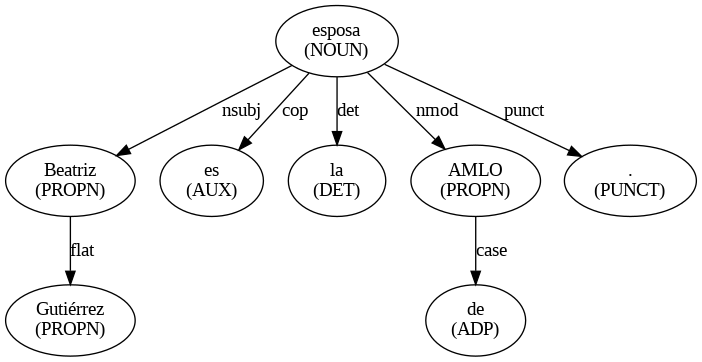

In [ ]:
from graphviz import Digraph

text = "Beatriz Gutiérrez es la esposa de AMLO."
doc = nlp(text, disable=["ner"])

def create_dependency_tree(doc):
    dot = Digraph()
    for token in doc:
        dot.node(str(token.i), f"{token.text}\n({token.pos_})")
        if token.head.i != token.i:  # token.head.i == token.i if the token is the root
            dot.edge(str(token.head.i), str(token.i), label=token.dep_)
    return dot

dot = create_dependency_tree(doc)
dot.render("dependency_tree", format="png")

Image(filename="dependency_tree.png")


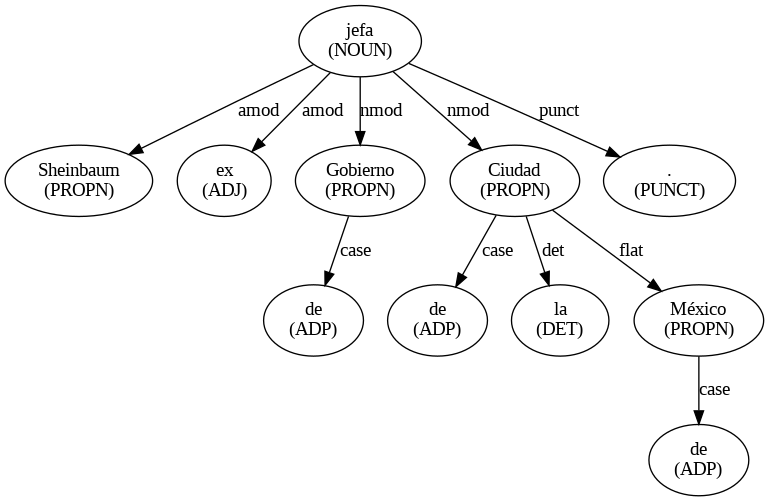

In [ ]:
text = "Sheinbaum ex jefa de Gobierno de la Ciudad de México."
doc = nlp(text, disable=["ner"])

dot = create_dependency_tree(doc)
dot.render("dependency_tree", format="png")

Image(filename="dependency_tree.png")